# GANs with PyTorch
Wanna watch some GANime?

## GAN is cool
Generative Neural Network is a smart generative model, which consists of 2 parts (Generator and Discriminator)<br>
Generator learns to generate images from noise and discriminator learns to classify images as fake or real.<br>
This forms sort of competition between generator and discriminator.<br>
Through this process we get a working generator.

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader, RandomSampler
from torchvision import transforms
from torchvision.datasets import ImageFolder

from torchinfo import summary

import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

In [ ]:
root_dir = "/kaggle/input/anime-faces/data"

In [110]:
data_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

image_dataset = ImageFolder(root=root_dir, transform=data_transform)
image_dataset

Dataset ImageFolder
    Number of datapoints: 21551
    Root location: /kaggle/input/anime-faces/data
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )

In [111]:
train_dataloader = DataLoader(image_dataset, batch_size=128, shuffle=True,
                              num_workers=os.cpu_count(), pin_memory=True)

len(train_dataloader)

169

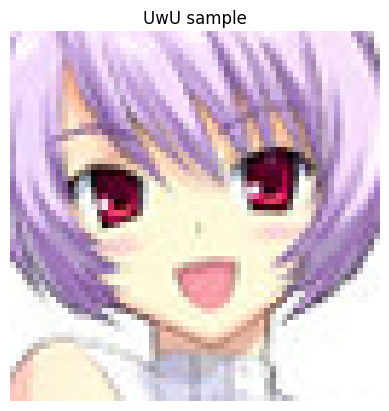

In [151]:
for image_batch, _ in train_dataloader:
    sample = image_batch[0]
    plt.axis("off")
    plt.title("UwU sample")
    plt.imshow(sample.permute(1, 2, 0));
    break

## It's time we build GAN

In [121]:
class Generator(nn.Module):
    def __init__(self, noise_size=100):
        super().__init__()
        self.noise_size = noise_size
        self.generator = nn.Sequential(
            nn.Linear(noise_size, 4*4*512),
            nn.Unflatten(1, (512, 4, 4)),
            nn.ConvTranspose2d(512, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.ConvTranspose2d(64, 3, kernel_size=4, stride=2, padding=1),
            nn.Tanh()
        )

    def forward(self, noise):
        return self.generator(noise)

In [123]:
class Discriminator(nn.Module):
    def __init__(self):
        super().__init__()
        self.discriminator = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Flatten(),
            nn.Linear(4 * 4 * 512, 1),
            nn.Sigmoid()
        )

    def forward(self, image):
        return self.discriminator(image)


## Training generator and discriminator

In [149]:
generator = Generator().to(device)
discriminator = Discriminator().to(device)

loss_fn = nn.BCELoss()
gen_optimizer = torch.optim.Adam(params=generator.parameters(), lr=0.0003)
disc_optimizer = torch.optim.Adam(params=discriminator.parameters(), lr=0.00005)

epochs = 70

Epoch: 1. DLoss: 1.430938959121704. GLoss: 2.8602075576782227
Epoch: 2. DLoss: 1.1288421154022217. GLoss: 3.1578991413116455
Epoch: 3. DLoss: 1.105458378791809. GLoss: 3.2970783710479736
Epoch: 4. DLoss: 1.1082526445388794. GLoss: 3.292872428894043
Epoch: 5. DLoss: 1.0111663341522217. GLoss: 3.5205812454223633
Epoch: 6. DLoss: 0.960034191608429. GLoss: 3.9587578773498535
Epoch: 7. DLoss: 0.9545726180076599. GLoss: 3.876478672027588
Epoch: 8. DLoss: 0.9307597875595093. GLoss: 3.86087965965271
Epoch: 9. DLoss: 0.905633270740509. GLoss: 3.694399833679199
Epoch: 10. DLoss: 0.9025205373764038. GLoss: 3.6134109497070312


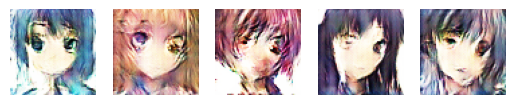

Epoch: 11. DLoss: 0.9003896713256836. GLoss: 3.5383410453796387
Epoch: 12. DLoss: 0.8789761662483215. GLoss: 3.4714550971984863
Epoch: 13. DLoss: 0.8640612363815308. GLoss: 3.5078823566436768
Epoch: 14. DLoss: 0.8679285049438477. GLoss: 3.4100234508514404
Epoch: 15. DLoss: 0.8836085796356201. GLoss: 3.4253342151641846
Epoch: 16. DLoss: 0.8244691491127014. GLoss: 3.418828010559082
Epoch: 17. DLoss: 0.8049677014350891. GLoss: 3.5202529430389404
Epoch: 18. DLoss: 0.816192626953125. GLoss: 3.4073781967163086
Epoch: 19. DLoss: 0.8742028474807739. GLoss: 3.403644561767578
Epoch: 20. DLoss: 0.7528579831123352. GLoss: 3.37650203704834


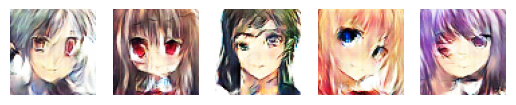

Epoch: 21. DLoss: 0.8522291779518127. GLoss: 3.4148170948028564
Epoch: 22. DLoss: 0.6755090951919556. GLoss: 3.193455457687378
Epoch: 23. DLoss: 0.7347443103790283. GLoss: 3.371163845062256
Epoch: 24. DLoss: 0.7062622308731079. GLoss: 3.436310052871704
Epoch: 25. DLoss: 0.8903675079345703. GLoss: 3.2383859157562256
Epoch: 26. DLoss: 0.6328208446502686. GLoss: 3.3303375244140625
Epoch: 27. DLoss: 0.8353162407875061. GLoss: 3.3069379329681396
Epoch: 28. DLoss: 0.7586402893066406. GLoss: 3.2958948612213135
Epoch: 29. DLoss: 0.7675439119338989. GLoss: 3.2759056091308594
Epoch: 30. DLoss: 0.6341342329978943. GLoss: 3.2649073600769043


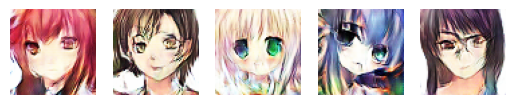

Epoch: 31. DLoss: 0.7186331152915955. GLoss: 3.426795721054077
Epoch: 32. DLoss: 0.5993346571922302. GLoss: 3.394958972930908
Epoch: 33. DLoss: 0.6053348183631897. GLoss: 3.476977586746216
Epoch: 34. DLoss: 1.224901556968689. GLoss: 2.838501453399658
Epoch: 35. DLoss: 0.7667773365974426. GLoss: 3.0541470050811768
Epoch: 36. DLoss: 0.8225330710411072. GLoss: 3.150394916534424
Epoch: 37. DLoss: 0.7807499766349792. GLoss: 3.0255424976348877
Epoch: 38. DLoss: 0.6148379445075989. GLoss: 3.1967766284942627
Epoch: 39. DLoss: 0.5304877161979675. GLoss: 3.2228710651397705
Epoch: 40. DLoss: 0.8220653533935547. GLoss: 3.2440907955169678


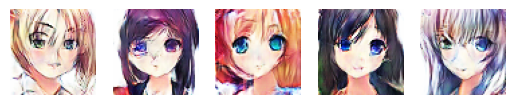

Epoch: 41. DLoss: 0.8105854392051697. GLoss: 3.1833322048187256
Epoch: 42. DLoss: 0.9236785173416138. GLoss: 2.553382635116577
Epoch: 43. DLoss: 0.6365495920181274. GLoss: 3.1764938831329346
Epoch: 44. DLoss: 0.6172492504119873. GLoss: 3.2113358974456787
Epoch: 45. DLoss: 0.6599812507629395. GLoss: 3.2374982833862305
Epoch: 46. DLoss: 0.5847318172454834. GLoss: 3.3329482078552246
Epoch: 47. DLoss: 0.6534001231193542. GLoss: 3.3364474773406982
Epoch: 48. DLoss: 0.5616148710250854. GLoss: 3.247652292251587
Epoch: 49. DLoss: 0.8716333508491516. GLoss: 3.071316957473755
Epoch: 50. DLoss: 0.5667465329170227. GLoss: 3.244886875152588


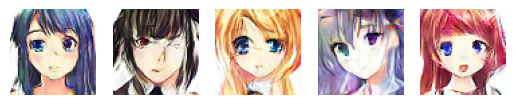

Epoch: 51. DLoss: 0.5697994828224182. GLoss: 3.2841804027557373
Epoch: 52. DLoss: 0.6893563866615295. GLoss: 3.308441400527954
Epoch: 53. DLoss: 0.585624635219574. GLoss: 3.3225741386413574
Epoch: 54. DLoss: 0.5824066996574402. GLoss: 3.3807907104492188
Epoch: 55. DLoss: 0.6504974961280823. GLoss: 3.499833106994629
Epoch: 56. DLoss: 0.4686107337474823. GLoss: 3.210512161254883
Epoch: 57. DLoss: 0.6256581544876099. GLoss: 3.340144157409668
Epoch: 58. DLoss: 0.5838706493377686. GLoss: 3.438751459121704
Epoch: 59. DLoss: 0.46723702549934387. GLoss: 3.2521250247955322
Epoch: 60. DLoss: 0.7704501152038574. GLoss: 3.2961227893829346


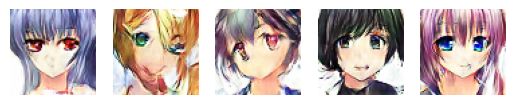

Epoch: 61. DLoss: 0.5716493129730225. GLoss: 3.263817071914673
Epoch: 62. DLoss: 0.5344181656837463. GLoss: 3.3061201572418213
Epoch: 63. DLoss: 0.8071790933609009. GLoss: 3.1099038124084473
Epoch: 64. DLoss: 0.5388582944869995. GLoss: 3.382416009902954
Epoch: 65. DLoss: 0.5104062557220459. GLoss: 3.325031042098999
Epoch: 66. DLoss: 0.7612367272377014. GLoss: 3.181999683380127
Epoch: 67. DLoss: 0.6349411606788635. GLoss: 3.214040517807007
Epoch: 68. DLoss: 0.5079500079154968. GLoss: 3.266268730163574
Epoch: 69. DLoss: 0.7011169195175171. GLoss: 3.1094844341278076
Epoch: 70. DLoss: 0.5447657108306885. GLoss: 3.252455472946167


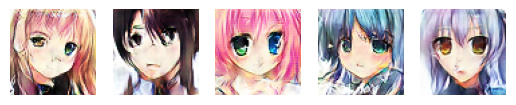

In [150]:
# Initialize models
generator = Generator().to(device)
discriminator = Discriminator().to(device)
loss_fn = nn.BCELoss()
# Optimizers
gen_optimizer = torch.optim.Adam(generator.parameters(), lr=0.001, betas=(0.5, 0.999))
gen_scheduler = torch.optim.lr_scheduler.StepLR(gen_optimizer, step_size=20, gamma=0.9)
disc_optimizer = torch.optim.Adam(discriminator.parameters(), lr=0.001, betas=(0.5, 0.999))

# Training loop
for epoch in range(epochs):
    d_loss = 0
    g_loss = 0
    for real_images, _ in train_dataloader:
        real_images = real_images.to(device)
        batch_size = real_images.size(0)
        real_images = real_images * 2 - 1
        
        # Train Discriminator
        disc_optimizer.zero_grad()
        
        # Real Images
        labels_real = torch.full((batch_size, 1), 0.95, device=device)  # Smoothed real labels
        out_real = discriminator(real_images)
        loss_real = loss_fn(out_real, labels_real)
        loss_real.backward()
        
        # Fake Images
        noise = torch.randn(batch_size, 100, device=device)
        generated = generator(noise)
        labels_fake = torch.full((batch_size, 1), 0.05, device=device)  # Smoothed fake labels
        out_fake = discriminator(generated.detach())
        loss_fake = loss_fn(out_fake, labels_fake)
        loss_fake.backward()
        
        loss_disc = loss_real + loss_fake
        d_loss += loss_disc
        disc_optimizer.step()
        
        # Train Generator
        gen_optimizer.zero_grad()
        out_gen = discriminator(generated)
        labels_gen = torch.ones((batch_size, 1), device=device)
        gen_loss = loss_fn(out_gen, labels_gen)
        g_loss += gen_loss
        gen_loss.backward()
        gen_optimizer.step()
    gen_scheduler.step()
        
    print(f"Epoch: {epoch+1}. DLoss: {d_loss / len(train_dataloader)}. GLoss: {g_loss / len(train_dataloader)}")
    if (epoch+1) % 10 == 0:
        noise = torch.randn(5, 100, device=device)
        fake = generator(noise)
        fake = (fake + 1) / 2
        fig = plt.figure()
        for i in range(5):
            plt.subplot(1, 5, i+1)
            plt.axis("off")
            plt.imshow(fake[i].permute(1, 2, 0).detach().cpu().numpy())
        plt.show()

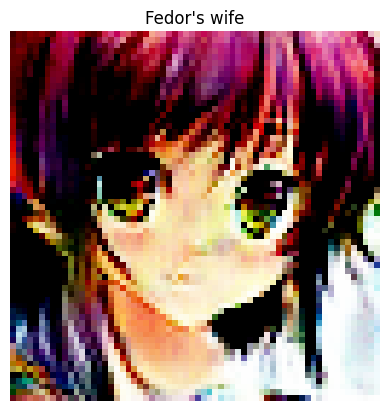

In [161]:
random_noise = torch.randn(1, 100, device=device)
generated_img = generator(random_noise)
plt.title("Fedor's wife")
plt.axis("off")
plt.imshow(generated_img.squeeze(0).permute(1, 2, 0).detach().cpu().numpy());

# Fedor after this.
<img src="https://i.ibb.co/Z1LVm4S3/lol.jpg" width=30%><br>